In [86]:
#Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [87]:
df=pd.read_csv('train.csv')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [89]:
# Checking for percentage nulls
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [90]:
# describe the dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [91]:
df.shape

(1460, 81)

In [92]:
# Checking the null values and printing them in descending order

null_df = df.isnull().sum()/len(df)*100
null_df = null_df[null_df>0]
null_df.sort_values(inplace=True, ascending=False)
null_df

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [93]:
# As per the data_dictionary if below columns have null value it implies that the particular/feature is not available, 
#therefore the null values in these columns can be imputed with 'none'
null_to_be_retained=["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

for i in null_to_be_retained:
    df[i].fillna('none',inplace=True)
    

In [94]:
# Check nulls once again

df.columns[df.isnull().any()] 

null_2 = df.isnull().sum()/len(df)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [95]:
# Checking whether the columns having null values can be dropped or not
df['LotFrontage'].describe()


count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [96]:
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [97]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [98]:
df['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [99]:
# Missing values are being imputed
df['LotFrontage'] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df["Electrical"].dropna(inplace=True)

In [100]:
# Crosscheck the updated 'LotFrontage' column
df['LotFrontage'].describe()

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [101]:
# Crosscheck the updated 'GarageYrBlt' column
df['GarageYrBlt'].describe()

count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [102]:
# Crosscheck the updated 'MasVnrArea' column
df['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [103]:
df.columns[df.isnull().any()] 

Index(['Electrical'], dtype='object')

# EDA on cleaned dataset

In [104]:
# select categorical columns
df_categorical=df.select_dtypes(include=['object'])
df_categorical

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
1,RL,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
2,RL,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
3,RL,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,none,none,none,WD,Abnorml
4,RL,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
1456,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,none,MnPrv,none,WD,Normal
1457,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,none,GdPrv,Shed,WD,Normal
1458,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,none,none,none,WD,Normal


In [105]:
# select numeric columns
df_numeric=df.select_dtypes(include=['int64'])
df_numeric

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [106]:
# Dropping the Id column as it does not add any value in the prediction 
df.drop(['Id'],axis=1,inplace=True)

In [107]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,...,0,none,none,none,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,...,0,none,none,none,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,...,0,none,none,none,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,...,0,none,none,none,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,...,0,none,none,none,0,12,2008,WD,Normal,250000


In [108]:
df['HouseStyle'].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

Text(0.5, 1.0, 'Sales Price against OverallCond')

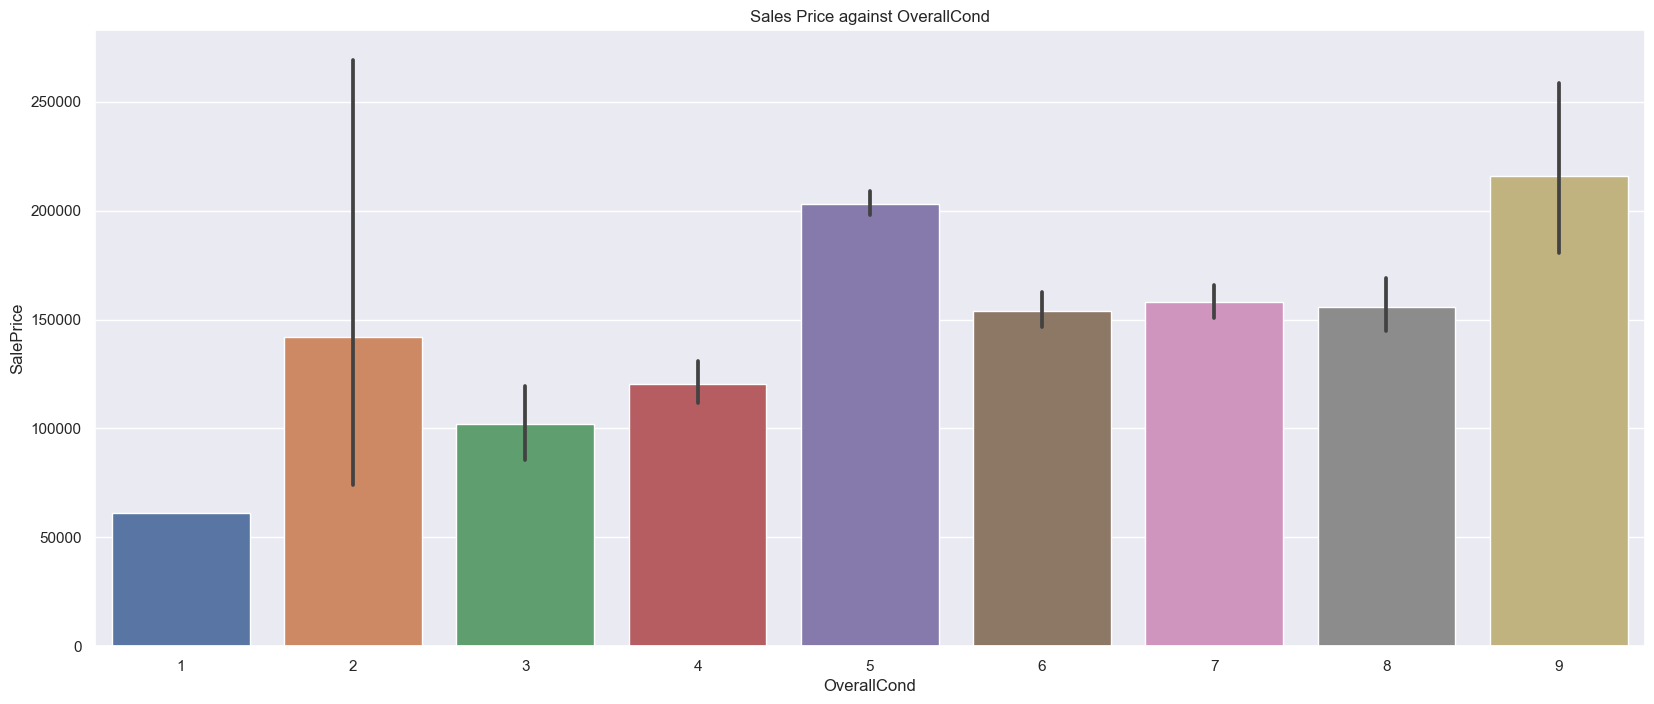

In [109]:
# plot 'Sale Price' with respect to 'HouseStyle'
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= df)
plt.title("Sales Price against OverallCond")

Text(0.5, 1.0, 'Sales Price against Overall Quality')

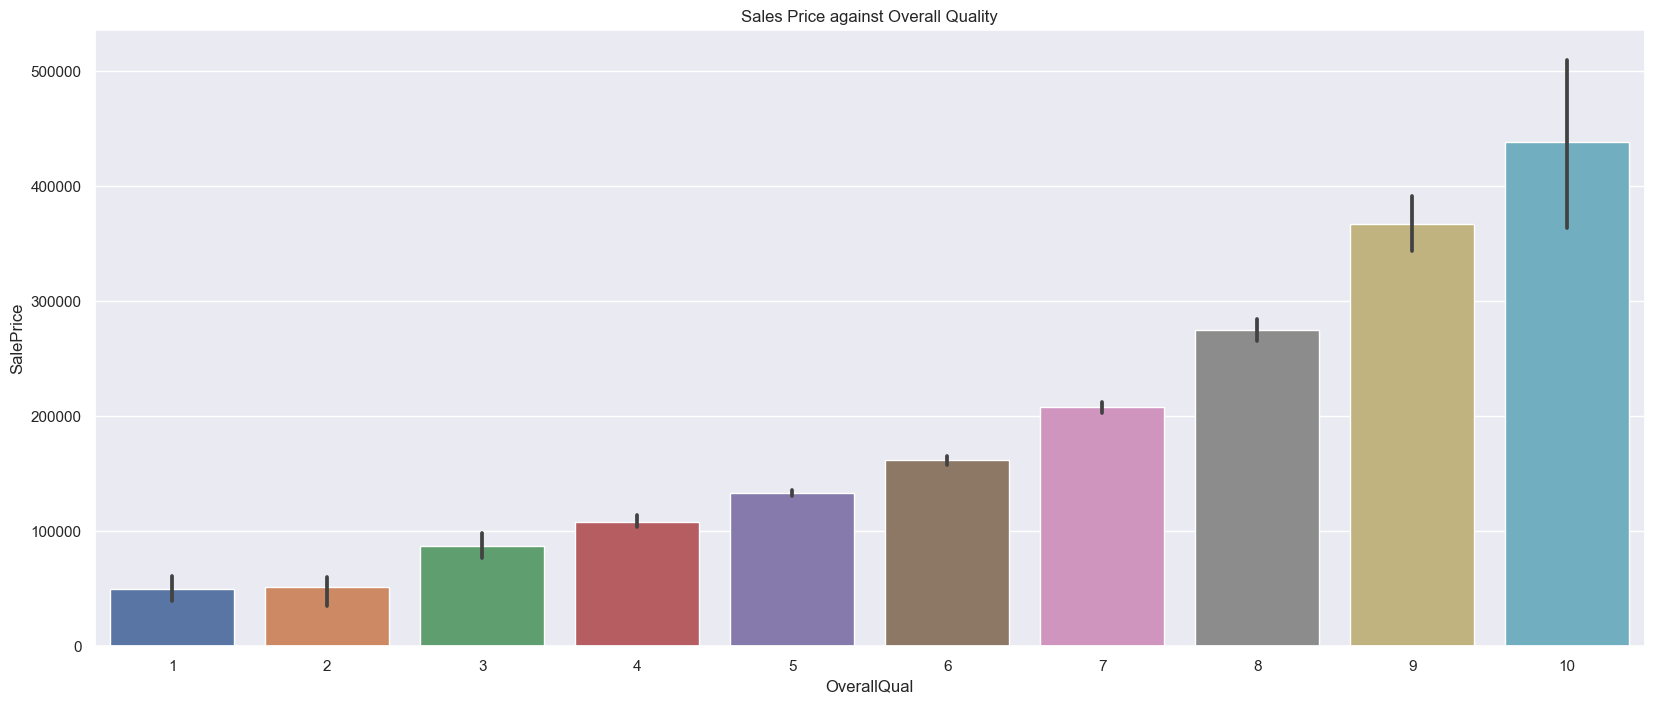

In [110]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= df)
plt.title("Sales Price against Overall Quality")

In [111]:
# PropAge -  Property Age from yearsold - yearbuilt
df['PropAge'] = (df['YrSold'] - df['YearBuilt'])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,...,none,none,none,0,2,2008,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,...,none,none,none,0,5,2007,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,...,none,none,none,0,9,2008,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,...,none,none,none,0,2,2006,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,...,none,none,none,0,12,2008,WD,Normal,250000,8


<Axes: xlabel='PropAge', ylabel='SalePrice'>

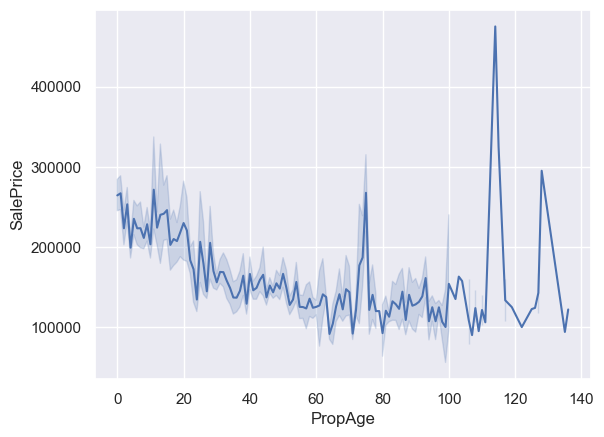

In [112]:
# Checking the sale price distribution against the Property age
sns.lineplot(data=df, x="PropAge", y="SalePrice")

In [113]:
# Dropping the columns 'MoSold','YearBuilt','YrSold','YearRemodAdd' as the new column is added 'PropAge'
df.drop(['MoSold','YearBuilt','YrSold','YearRemodAdd'], axis = 1, inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,...,0,0,none,none,none,0,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,...,0,0,none,none,none,0,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,...,0,0,none,none,none,0,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,...,0,0,none,none,none,0,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,...,0,0,none,none,none,0,WD,Normal,250000,8


<Axes: xlabel='SalePrice', ylabel='Density'>

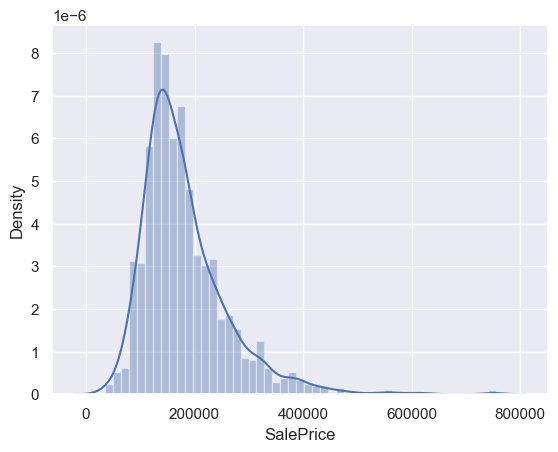

In [114]:
# Checking distribution of SalePrice
sns.distplot(df['SalePrice'])

In [115]:
#Log Transformation as the SalePrice distribution is left skewed 
df['SalePrice']=np.log1p(df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

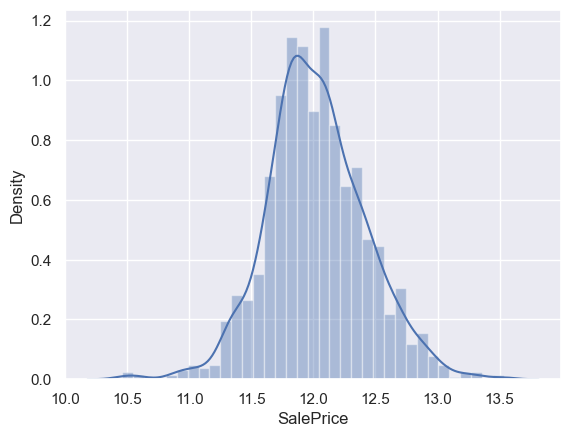

In [116]:
# Checking distribution of SalePrice
sns.distplot(df['SalePrice'])

In [117]:
# correlation matrix of numerical columns
cor = df_numeric.corr()
cor

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.005024,-0.005968,-0.007940,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.007940,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


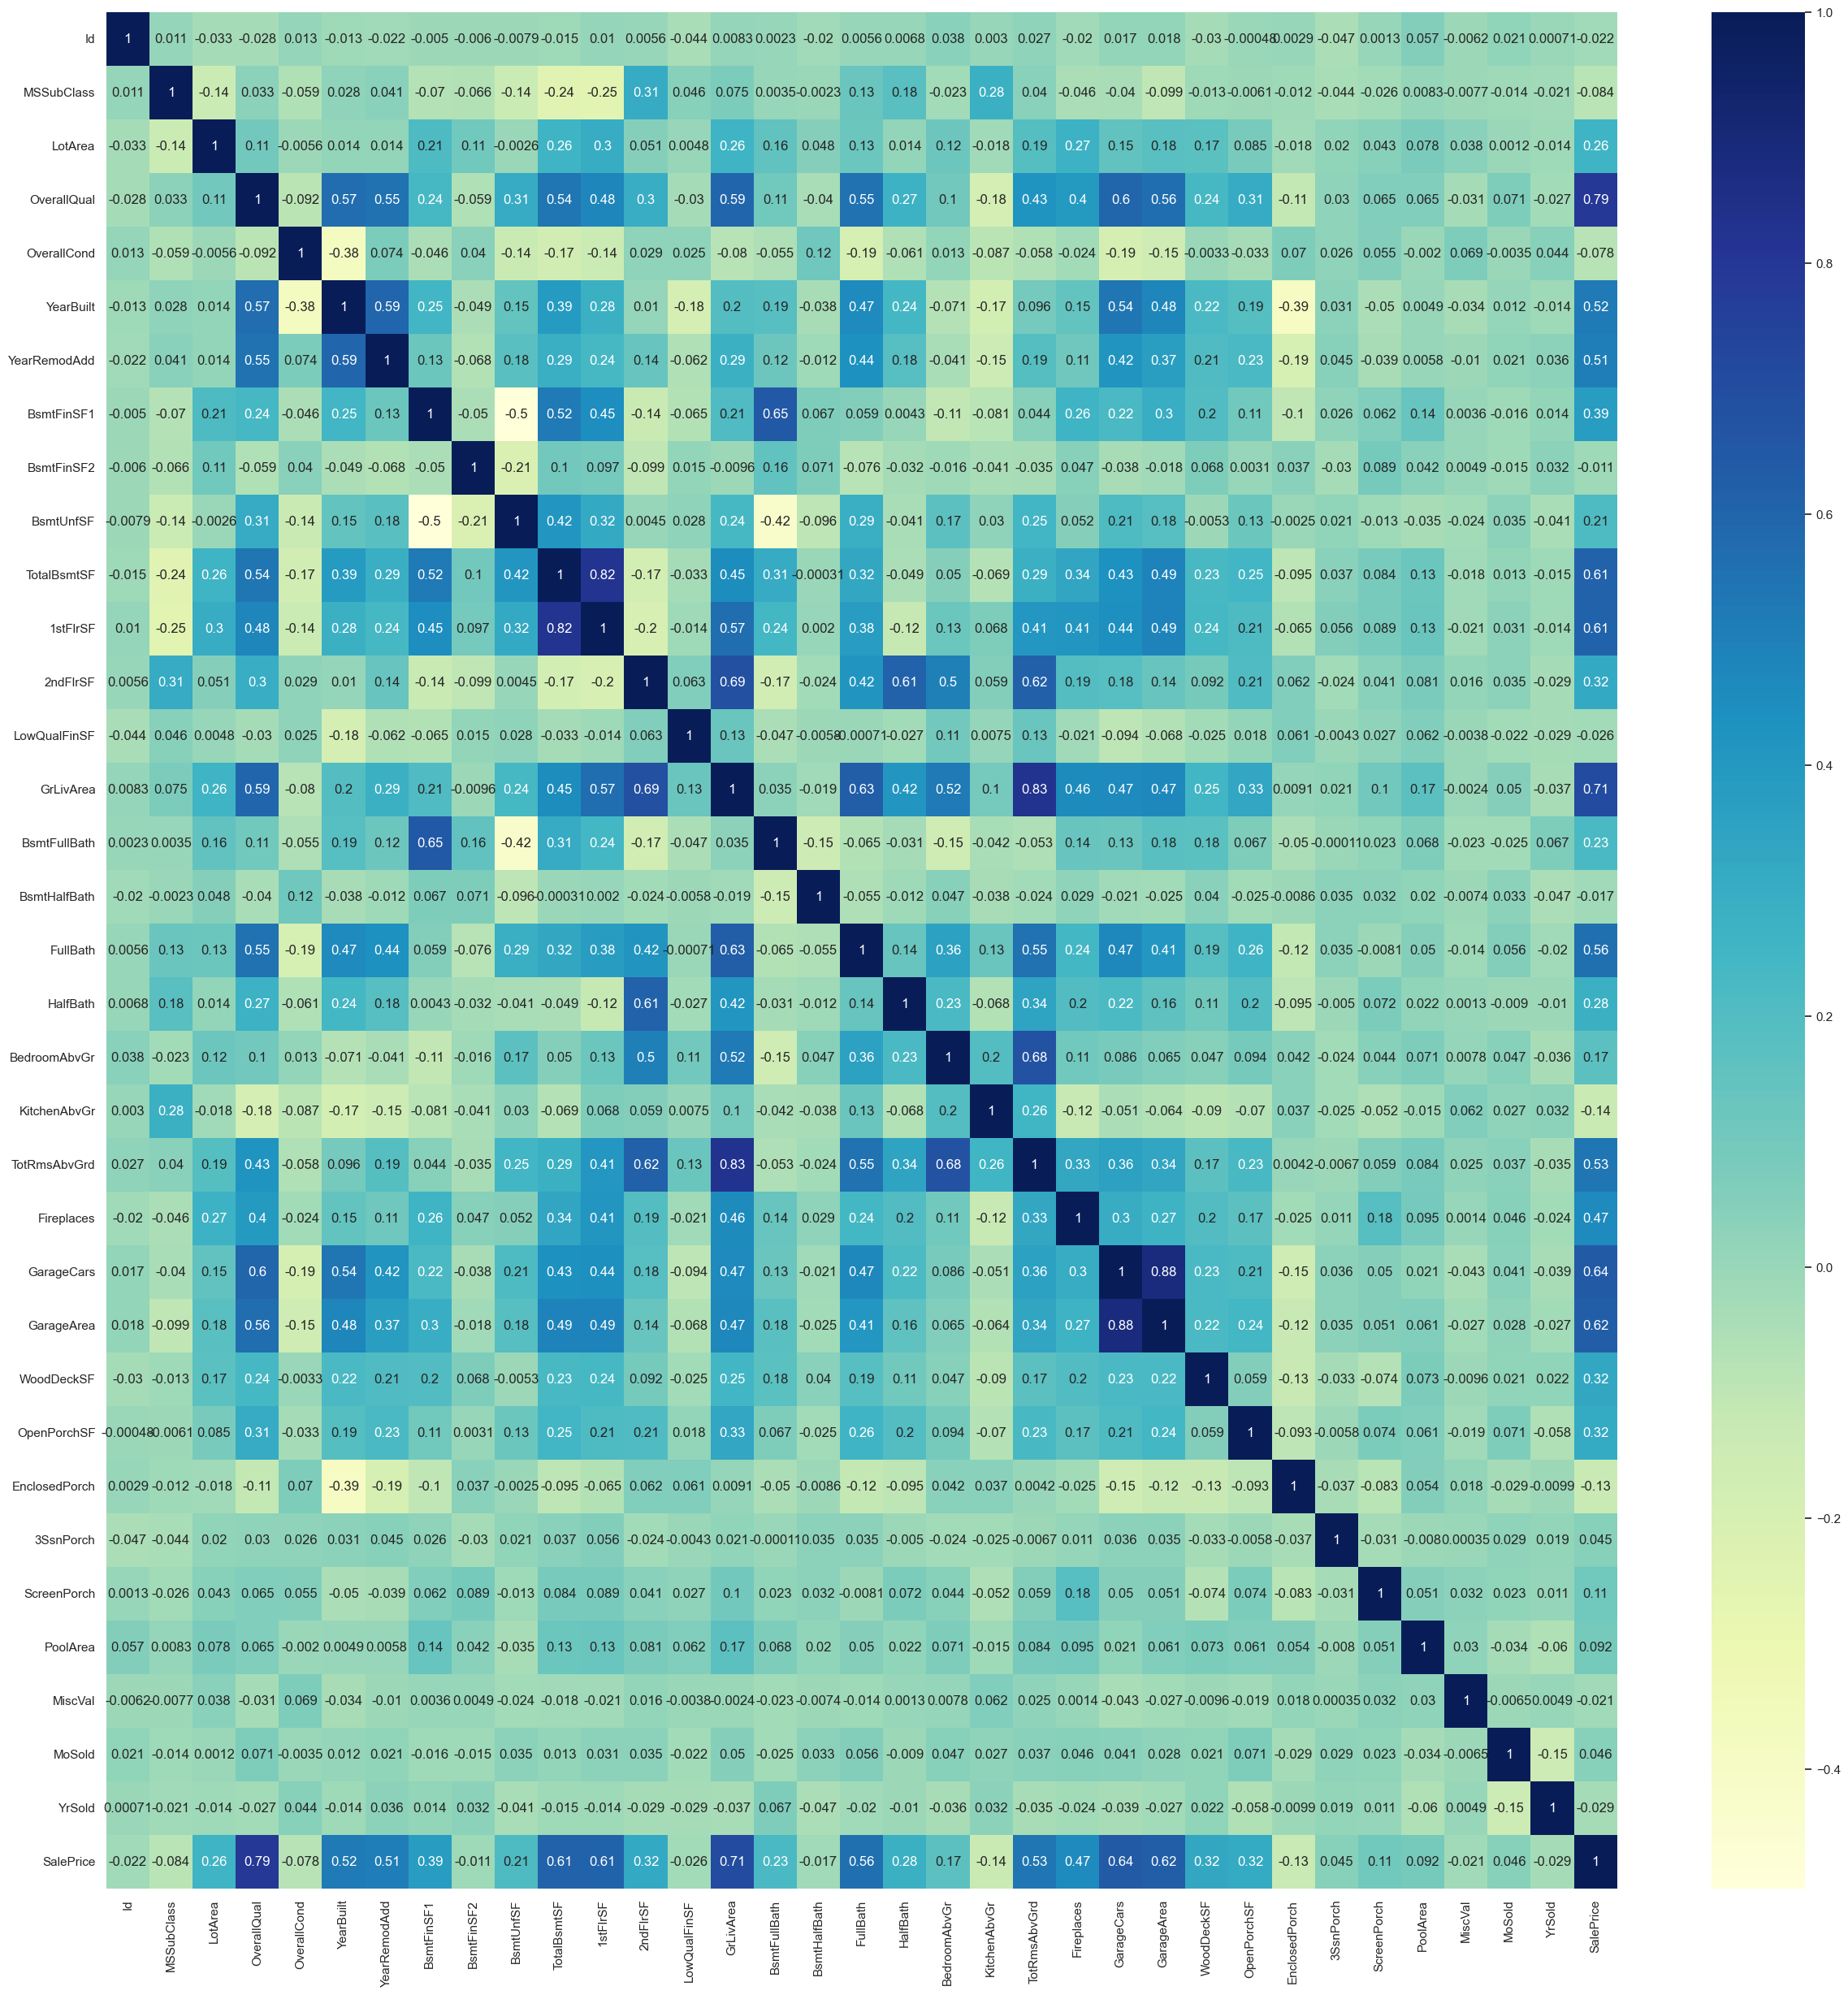

In [118]:
plt.figure(figsize=(30,30))
sns.heatmap(cor,cmap="YlGnBu", annot=True)
plt.show()

In [119]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'En

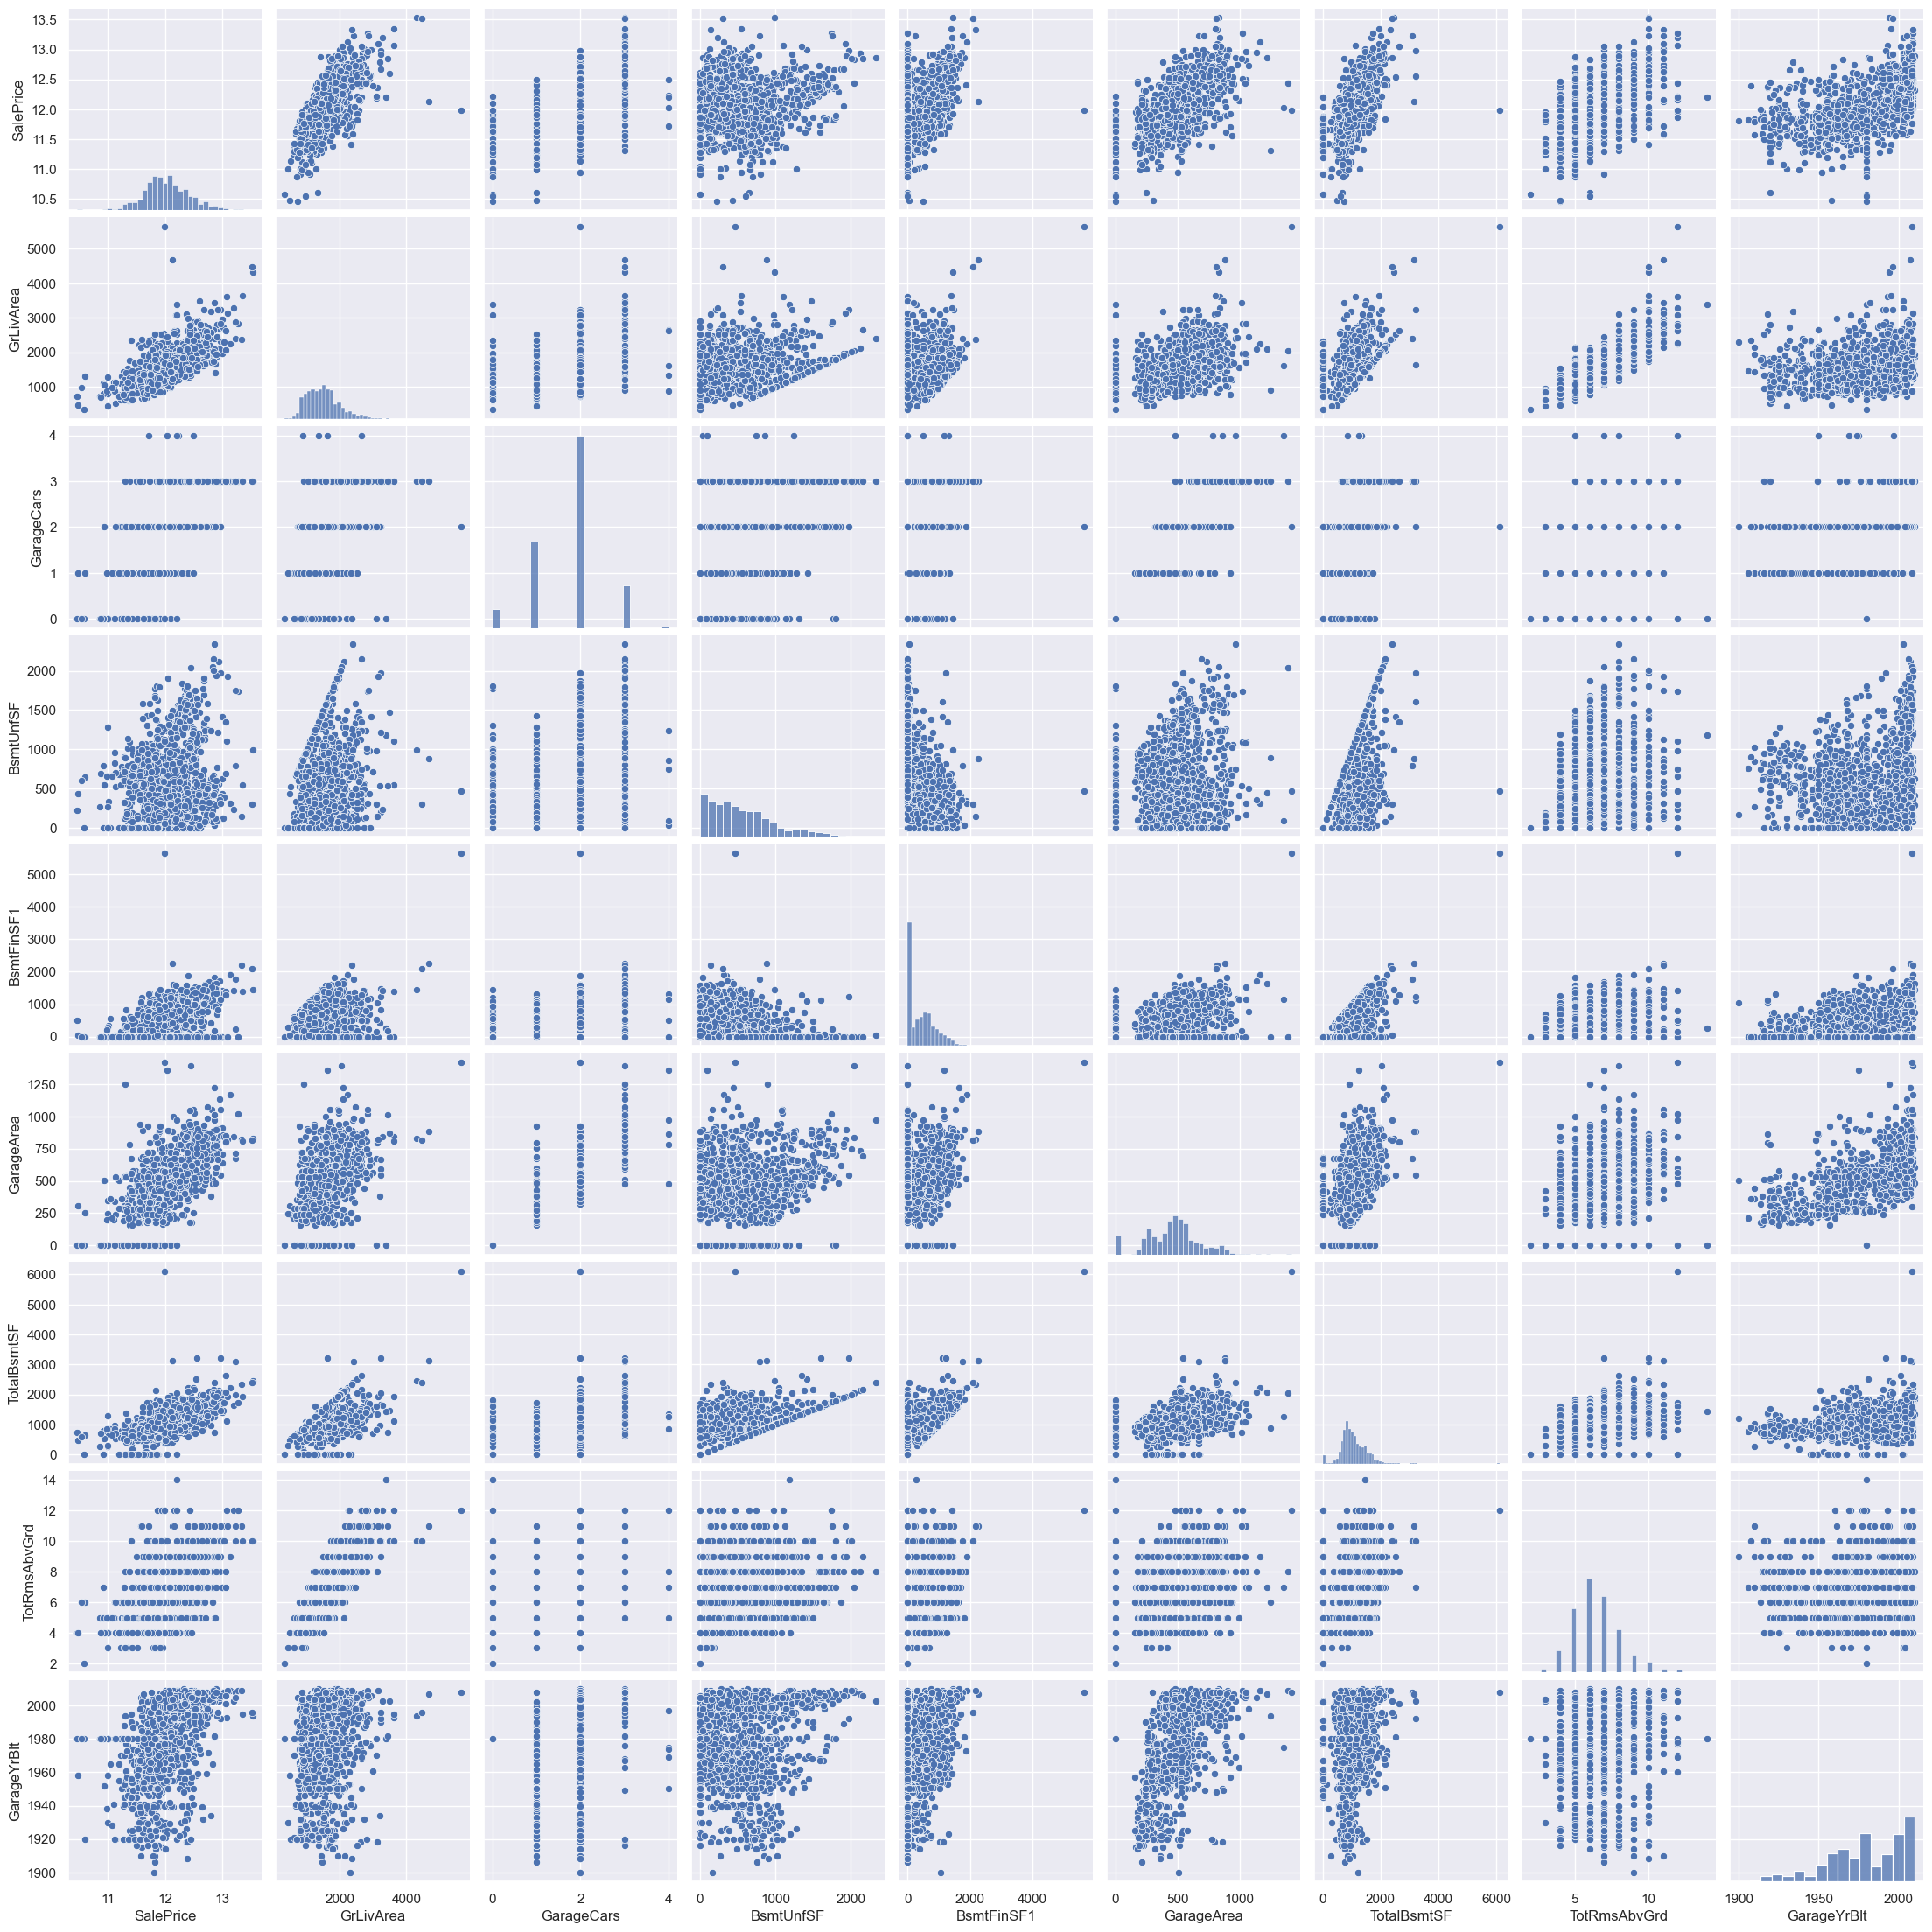

In [120]:
# Checking the correlation through pair plot
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [121]:
# Dropping the columns
df.drop(['GarageCars','TotRmsAbvGrd','BsmtUnfSF'],axis=1,inplace=True)

In [122]:
df.shape

(1460, 74)

In [123]:
# Identifying the numerical and categorical columns for further analysis
numeric_type= df.select_dtypes(include=['int64','float'])

categorical_type= df.select_dtypes(include=['object'])


In [124]:
numeric_type

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropAge
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,548,0,61,0,0,0,0,0,12.247699,5
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,460,298,0,0,0,0,0,0,12.109016,31
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,608,0,42,0,0,0,0,0,12.317171,7
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,642,0,35,272,0,0,0,0,11.849405,91
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,836,192,84,0,0,0,0,0,12.429220,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,0.0,0,0,953,953,...,460,0,40,0,0,0,0,0,12.072547,8
1456,20,85.0,13175,6,6,119.0,790,163,1542,2073,...,500,349,0,0,0,0,0,0,12.254868,32
1457,70,66.0,9042,7,9,0.0,275,0,1152,1188,...,252,0,60,0,0,0,0,2500,12.493133,69
1458,20,68.0,9717,5,6,0.0,49,1029,1078,1078,...,240,366,0,112,0,0,0,0,11.864469,60


In [125]:
categorical_type

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
1,RL,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
2,RL,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
3,RL,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,none,none,none,WD,Abnorml
4,RL,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
1456,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,none,MnPrv,none,WD,Normal
1457,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,none,GdPrv,Shed,WD,Normal
1458,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,none,none,none,WD,Normal


In [126]:
# Listing the categorical columns distribution 
for i in categorical_type:
    print(df[i].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
none    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Nei

In [127]:
df.drop(['LandContour','RoofStyle','BsmtFinType2','GarageFinish','PavedDrive'], inplace=True, axis=1)

In [128]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Pave,none,Reg,AllPub,Inside,Gtl,...,0,0,none,none,none,0,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,none,Reg,AllPub,FR2,Gtl,...,0,0,none,none,none,0,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,none,IR1,AllPub,Inside,Gtl,...,0,0,none,none,none,0,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,none,IR1,AllPub,Corner,Gtl,...,0,0,none,none,none,0,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,none,IR1,AllPub,FR2,Gtl,...,0,0,none,none,none,0,WD,Normal,12.429220,8


In [129]:
# Getting the dummy values for categorical column
df = pd.get_dummies(df, drop_first=True )
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


# Test/Train data split

In [130]:
X = df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [131]:
# Putting response variable to y
y = df['SalePrice']

y.head()


0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [132]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=100)

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])


In [135]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)


X_train (1021, 235)
y_train (1021,)


In [136]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,0.035305,0.887747,-0.057261,0.648310,-0.532073,0.809137,1.159065,-0.293313,0.621091,0.511410,...,0,0,0,0,1,0,0,0,1,0
239,-0.195760,-0.806731,-0.169753,-0.066511,-1.448170,-0.558025,-0.761831,-0.293313,-0.712611,-0.931882,...,0,0,0,0,1,0,0,0,1,0
986,-0.195760,-0.494591,-0.502762,-0.066511,2.216221,-0.558025,-0.964030,-0.293313,-1.257424,-0.421449,...,0,0,0,0,1,0,0,0,1,0
1416,3.039142,-0.449999,0.082504,-1.496155,0.384025,-0.558025,-0.964030,-0.293313,-0.621082,0.194590,...,0,0,0,0,1,0,0,0,1,0
390,-0.195760,-0.895914,-0.202365,-0.781333,2.216221,-0.558025,-0.445625,1.996400,-0.438025,-0.522027,...,0,0,0,0,1,0,0,0,1,0


In [137]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [138]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.151280,0.074380,0.002272,0.001397,0.0001,{'alpha': 0.0001},-0.084081,-0.091790,-0.091325,-0.076650,...,-0.083885,0.006916,1,-0.059786,-0.059882,-0.060697,-0.061690,-0.061083,-0.060628,0.000722
1,0.045644,0.010524,0.001647,0.000704,0.001,{'alpha': 0.001},-0.086700,-0.094668,-0.091788,-0.075452,...,-0.085727,0.007151,2,-0.077554,-0.071729,-0.072659,-0.078288,-0.077758,-0.075598,0.002805
2,0.008960,0.002048,0.001561,0.000959,0.01,{'alpha': 0.01},-0.097798,-0.107619,-0.107386,-0.092568,...,-0.101301,0.005753,3,-0.100158,-0.090517,-0.096492,-0.101965,-0.102541,-0.098334,0.004443
3,0.005684,0.001192,0.002120,0.000929,0.05,{'alpha': 0.05},-0.127847,-0.133717,-0.136488,-0.126457,...,-0.133303,0.005704,4,-0.136030,-0.123823,-0.130503,-0.135269,-0.135979,-0.132321,0.004719
4,0.005657,0.001831,0.001312,0.000479,0.1,{'alpha': 0.1},-0.162821,-0.169259,-0.166902,-0.156222,...,-0.165667,0.005787,5,-0.167058,-0.161843,-0.163362,-0.165757,-0.167495,-0.165103,0.002174


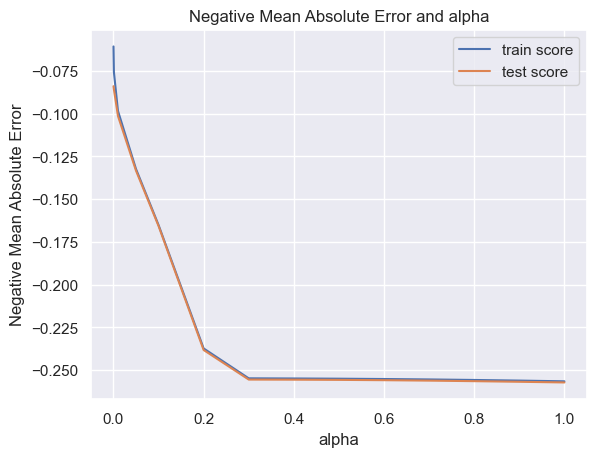

In [139]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [140]:

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-2.16355043e-02,  0.00000000e+00,  1.02635294e-02,  1.29863417e-01,
        4.10553757e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.09039735e-02,  4.83506712e-03,  0.00000000e+00, -0.00000000e+00,
        1.09322693e-01,  3.34782183e-02,  3.42247159e-04,  1.43086296e-02,
        1.06357362e-03,  0.00000000e+00, -1.56310584e-03,  3.51965792e-02,
        9.83809875e-04,  4.14667047e-02,  1.26860895e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.69760264e-03, -1.66616637e-02,
       -2.74332737e-06, -7.60693764e-02,  0.00000000e+00,  0.00000000e+00,
        4.57189553e-03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [142]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.068),
 ('MSSubClass', -0.022),
 ('LotFrontage', 0.0),
 ('LotArea', 0.01),
 ('OverallQual', 0.13),
 ('OverallCond', 0.041),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.021),
 ('1stFlrSF', 0.005),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.109),
 ('BsmtFullBath', 0.033),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.014),
 ('HalfBath', 0.001),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.002),
 ('Fireplaces', 0.035),
 ('GarageYrBlt', 0.001),
 ('GarageArea', 0.041),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.005),
 ('PoolArea', -0.017),
 ('MiscVal', -0.0),
 ('PropAge', -0.076),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.005),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', 0.0),
 ('Alley_Pave', 0.0),
 ('Alley_none', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('Utilities_NoSeWa', -0.0),
 ('LotConfig

In [143]:

# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8533730227313288
0.8568373333869614


In [144]:
print('RMSE score :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


RMSE score : 0.15360666458706093


In [145]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))


In [146]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()


,Variable,Coeff
0,constant,10.068
1,MSSubClass,-0.022
2,LotFrontage,0.000
3,LotArea,0.010
4,OverallQual,0.130


In [147]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para


,Variable,Coeff
0,constant,10.068
4,OverallQual,0.130
13,GrLivArea,0.109
5,OverallCond,0.041
22,GarageArea,0.041
...,...,...
235,SaleCondition_Partial,0.000
19,KitchenAbvGr,-0.002
28,PoolArea,-0.017
1,MSSubClass,-0.022


In [148]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred


,Variable,Coeff
0,constant,10.068
4,OverallQual,0.130
13,GrLivArea,0.109
5,OverallCond,0.041
22,GarageArea,0.041
20,Fireplaces,0.035
14,BsmtFullBath,0.033
9,TotalBsmtSF,0.021
16,FullBath,0.014
23,WoodDeckSF,0.013


In [149]:
pred.shape

(21, 2)

# Ridge model Evaluation 

In [151]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [152]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014265,0.016629,0.002502,0.001980,0.0001,{'alpha': 0.0001},-0.091292,-0.095069,-0.095095,-0.084654,...,-0.090024,0.004854,9,-0.055954,-0.057187,-0.057921,-0.058006,-0.057497,-0.057313,0.000741
1,0.004053,0.000996,0.001133,0.000062,0.001,{'alpha': 0.001},-0.090958,-0.095026,-0.095080,-0.084576,...,-0.089914,0.004862,8,-0.055985,-0.057198,-0.057938,-0.058048,-0.057530,-0.057340,0.000742
2,0.004518,0.001923,0.001161,0.000097,0.01,{'alpha': 0.01},-0.090222,-0.094820,-0.095069,-0.084073,...,-0.089508,0.005041,5,-0.056120,-0.057288,-0.058010,-0.058205,-0.057677,-0.057460,0.000739
3,0.009298,0.009015,0.001648,0.001021,0.05,{'alpha': 0.05},-0.090136,-0.094660,-0.094992,-0.083106,...,-0.088993,0.005513,3,-0.056785,-0.057614,-0.058446,-0.058884,-0.058325,-0.058011,0.000736
4,0.005068,0.002037,0.001615,0.000981,0.1,{'alpha': 0.1},-0.090238,-0.094583,-0.095100,-0.082665,...,-0.088816,0.005765,1,-0.057733,-0.057985,-0.059100,-0.059817,-0.059347,-0.058797,0.000803


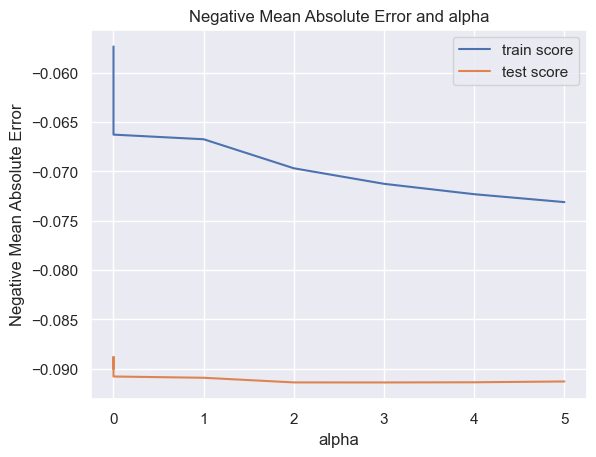

In [154]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [155]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_


array([-2.52964217e-02, -7.47295417e-03,  1.81178059e-02,  7.01662483e-02,
        4.21914316e-02, -3.32068851e-03, -4.72169133e-03,  2.74530607e-04,
        1.18580077e-02,  4.44717306e-02,  4.69108219e-02,  2.79268641e-03,
        7.19364800e-02,  2.60089666e-02,  2.79446325e-03,  1.87730865e-02,
        1.25431244e-02,  1.50856660e-02, -1.01622437e-02, -2.43752047e-03,
       -1.19951840e-04,  3.33883818e-02,  1.31127999e-02, -7.20113033e-04,
        7.28998063e-03,  7.19620716e-03,  1.01936997e-02, -9.98160648e-03,
        5.47676000e-06, -4.58099800e-02,  1.18444116e-01,  1.33916906e-01,
        1.48598720e-01,  1.23959051e-01,  6.05349841e-02,  3.86694345e-02,
        7.36007579e-03,  2.55774880e-02, -6.36144651e-02,  1.04026409e-02,
       -4.77641548e-02,  3.85553857e-02, -4.36829818e-02, -2.80198907e-02,
       -1.32259789e-02,  1.64161405e-02, -2.81600812e-02, -5.71089318e-03,
       -6.01346550e-02,  9.24391354e-03,  8.37642741e-02, -1.59150813e-02,
        1.32511405e-01, -

In [156]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))


[('constant', 11.628),
 ('MSSubClass', -0.025),
 ('LotFrontage', -0.007),
 ('LotArea', 0.018),
 ('OverallQual', 0.07),
 ('OverallCond', 0.042),
 ('MasVnrArea', -0.003),
 ('BsmtFinSF1', -0.005),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.012),
 ('1stFlrSF', 0.044),
 ('2ndFlrSF', 0.047),
 ('LowQualFinSF', 0.003),
 ('GrLivArea', 0.072),
 ('BsmtFullBath', 0.026),
 ('BsmtHalfBath', 0.003),
 ('FullBath', 0.019),
 ('HalfBath', 0.013),
 ('BedroomAbvGr', 0.015),
 ('KitchenAbvGr', -0.01),
 ('Fireplaces', -0.002),
 ('GarageYrBlt', -0.0),
 ('GarageArea', 0.033),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', -0.001),
 ('EnclosedPorch', 0.007),
 ('3SsnPorch', 0.007),
 ('ScreenPorch', 0.01),
 ('PoolArea', -0.01),
 ('MiscVal', 0.0),
 ('PropAge', -0.046),
 ('MSZoning_FV', 0.118),
 ('MSZoning_RH', 0.134),
 ('MSZoning_RL', 0.149),
 ('MSZoning_RM', 0.124),
 ('Street_Pave', 0.061),
 ('Alley_Pave', 0.039),
 ('Alley_none', 0.007),
 ('LotShape_IR2', 0.026),
 ('LotShape_IR3', -0.064),
 ('LotShape_Reg', 0.01),
 ('Util

In [157]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9335033719974899
0.8758345122187412


In [158]:
print('RMSE score:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


RMSE score: 0.14305255498380684


In [159]:
mod_ridge = list(zip(cols, model_parameters))


In [160]:
paraRidge = pd.DataFrame(mod_ridge)
paraRidge.columns = ['Variable', 'Coeff']
res=paraRidge.sort_values(by=['Coeff'], ascending = False)
paraRidge

,Variable,Coeff
0,constant,11.628
1,MSSubClass,-0.025
2,LotFrontage,-0.007
3,LotArea,0.018
4,OverallQual,0.070
...,...,...
231,SaleCondition_AdjLand,0.059
232,SaleCondition_Alloca,0.031
233,SaleCondition_Family,0.038
234,SaleCondition_Normal,0.054


In [161]:
# Sorting the coefficients in ascending order
paraRidge = paraRidge.sort_values((['Coeff']), axis = 0, ascending = False)
paraRidge
paraRidge.head(20)

,Variable,Coeff
0,constant,11.628
225,SaleType_ConLD,0.151
33,MSZoning_RL,0.149
32,MSZoning_RH,0.134
53,Neighborhood_Crawfor,0.133
34,MSZoning_RM,0.124
31,MSZoning_FV,0.118
104,RoofMatl_WdShngl,0.112
63,Neighborhood_NridgHt,0.107
169,Heating_GasW,0.106


In [162]:
## since there were few coefficients at 0, we removed them from features
paraRidge = pd.DataFrame(paraRidge[(paraRidge['Coeff'] != 0)])
paraRidge


,Variable,Coeff
0,constant,11.628
225,SaleType_ConLD,0.151
33,MSZoning_RL,0.149
32,MSZoning_RH,0.134
53,Neighborhood_Crawfor,0.133
...,...,...
54,Neighborhood_Edwards,-0.091
185,Functional_Maj2,-0.094
57,Neighborhood_MeadowV,-0.134
83,Condition2_PosN,-0.364


In [163]:
paraRidge.shape

(227, 2)

## From the model score, the ridge is the better performant model but it is prudent to use lasso model. Lasso is comparatively  easier to comprehend and it is assigns zero coefficient to insignificant variables.



In [172]:
# Listing the categorical columns distribution 
pred

,Variable,Coeff
0,constant,10.068
4,OverallQual,0.130
13,GrLivArea,0.109
5,OverallCond,0.041
22,GarageArea,0.041
20,Fireplaces,0.035
14,BsmtFullBath,0.033
9,TotalBsmtSF,0.021
16,FullBath,0.014
23,WoodDeckSF,0.013


## Top features to watch out for are as below 
- OverallQual
- GrLivArea
- OverallCond	
- GarageArea
- Fireplaces